# Tokenization

Tokenization is a process of breaking the input sequence into smaller parts so that we can some useful smaller units of sequence for semantic processing. Tokens can be a word, sentence, paragraph etc. But in general, mostly tokens are considered words in real life applications. 

There are so many tokenizers available in `nltk` library, we will see below three tokenizers and how they work - 
<ol>
    <li><b>WhitespaceTokenizer:</b>It tokenizes the string on whitespace</li>
    <li><b>WordPunctTokenizer:</b>It tokenizes a text into a sequence of alphabetic and non-alphabetic characters, using the regexp ``\w+|[^\w\s]+``.</li>
    <li><b>TreebankWordTokenizer:</b>The Treebank tokenizer uses regular expressions to tokenize text as in Penn Treebank</li>
</ol>

In [13]:
#!pip install nltk

In [3]:
# Example
sentence = "The weather outside is really hot and humid, isn't it?"

In [4]:
from nltk.tokenize import WhitespaceTokenizer
wst = WhitespaceTokenizer()
[wst.tokenize(token) for token in sentence.split(" ")]

[['The'],
 ['weather'],
 ['outside'],
 ['is'],
 ['really'],
 ['hot'],
 ['and'],
 ['humid,'],
 ["isn't"],
 ['it?']]

<font color='crimpson'><b>Disadvantage:</b> it can't distinguish between `it` and `it?` which are different tokens with same meaning</font>

In [5]:
from nltk.tokenize import WordPunctTokenizer
wpt = WordPunctTokenizer()
[wpt.tokenize(token) for token in sentence.split(" ")]

[['The'],
 ['weather'],
 ['outside'],
 ['is'],
 ['really'],
 ['hot'],
 ['and'],
 ['humid', ','],
 ['isn', "'", 't'],
 ['it', '?']]

<font color='crimpson'><b>Disadvantage:</b> it gives some tokes which are not meaningful such as - `s`, `isn`, `t`</font>

In [6]:
from nltk.tokenize import TreebankWordTokenizer
tbt = TreebankWordTokenizer()
[tbt.tokenize(token) for token in sentence.split(" ")]

[['The'],
 ['weather'],
 ['outside'],
 ['is'],
 ['really'],
 ['hot'],
 ['and'],
 ['humid', ','],
 ['is', "n't"],
 ['it', '?']]

<font color='Blue'><b>Advantage:</b> it is better than the above two tokenizers, here we can see `'s` and `n't` are more meaningful for processing</font>

# Normalization

While doing text analysis we may want to convert different varieties of words having similar meaning into a single entity. For example - 

<font color='green'>This `computer` is taking too much `computation` time while `computing` on this data set<font>
    
In the above example - are the words `computer`, `computation` and `computing` have different meaning? But computer will treat them differently.
    
<ol>
    <li>computer, computation, computing -> compute</li>
    <li>run, runs, running -> run</li>
</ol>  

### Types of text normalization

<font color='blue'><b>Stemming:</b> It is a process of removing and replacing suffixes to get to the root form of the word which is known as `stem`. There are three popular English stemmer - 
<ol>
    <li>Porter</li>
    <li>Lancester</li>
</ol>    
Stemming is generally a set of heuristics that chopps off suffixes. Porter stemmer has `5 heuristic phases` of word reductions that are applied sequentially. It is often noticed that stemming algorithm does not produce a real word after removing the stem, which is fine. But the purpose of stemming is to bring variant forms of a word together, not to map a word onto its ‘paradigm’ form.

Step 1a

    SSES -> SS                         caresses  ->  caress
    IES  -> I                          ponies    ->  poni
                                       ties      ->  ti
    SS   -> SS                         caress    ->  caress
    S    ->                            cats      ->  cat

Step 1b

    (m>0) EED -> EE                    feed      ->  feed
                                       agreed    ->  agree
    (*v*) ED  ->                       plastered ->  plaster
                                       bled      ->  bled
    (*v*) ING ->                       motoring  ->  motor
                                       sing      ->  sing

If the second or third of the rules in Step 1b is successful, the following
is done:

    AT -> ATE                       conflat(ed)  ->  conflate
    BL -> BLE                       troubl(ed)   ->  trouble
    IZ -> IZE                       siz(ed)      ->  size
    (*d and not (*L or *S or *Z))
       -> single letter
                                    hopp(ing)    ->  hop
                                    tann(ed)     ->  tan
                                    fall(ing)    ->  fall
                                    hiss(ing)    ->  hiss
                                    fizz(ed)     ->  fizz
    (m=1 and *o) -> E               fail(ing)    ->  fail
                                    fil(ing)     ->  file

The rule to map to a single letter causes the removal of one of the double
letter pair. The -E is put back on -AT, -BL and -IZ, so that the suffixes
-ATE, -BLE and -IZE can be recognised later. This E may be removed in step
4.

Step 1c

    (*v*) Y -> I                    happy        ->  happi
                                    sky          ->  sky

Step 1 deals with plurals and past participles. The subsequent steps are
much more straightforward.

<font color='blue'>You can go through the remaining rules of Porter stemming algorithm using this [link](https://tartarus.org/martin/PorterStemmer/def.txt)</font>

In [7]:
#from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [8]:
#stemmer.stem('Germany')

In [9]:
sentence = "This computer is taking too much computation time while computing on this data set"
tokens = tokenizer.tokenize(sentence)
" ".join([stemmer.stem(token) for token in tokens])

'thi comput is take too much comput time while comput on thi data set'

<font color='crimpson'><b>Disadvantage:</b> It fails on irregular forms and thereby produces non-words. In the above you can see that it has produced non-words like `thi` and `comput`</font>

<font color='blue'><b>Lemmatization:</b> It is a process of converting different versions of a word with the use of vocabulary and morphological analysis. It returns the base or a dictionary form of a word which is known as `lemma` - 
<ol>
    <li>WordNet Lemmatizer</li>
</ol>    
WordNet lemmatization uses `WordNet` database to look up the lemmas. You can check the database using this [link](http://wordnetweb.princeton.edu/perl/webwn), and this database is also downloaded when we use `nltk` library

In [16]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KANGRSW\AppData\Roaming\nltk_data...


True

In [14]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [17]:
sentence = "The wolves are at the door"
tokens = tokenizer.tokenize(sentence)
" ".join([lemmatizer.lemmatize(token) for token in tokens])

'The wolf are at the door'

In [ ]:
#lemmatizer.lemmatize

In [18]:
sentence = "the presentation could have been better"
tokens = tokenizer.tokenize(sentence)
" ".join([lemmatizer.lemmatize(token) for token in tokens])

'the presentation could have been better'

In [19]:
sentence = "he talked to the person"
tokens = tokenizer.tokenize(sentence)
" ".join([lemmatizer.lemmatize(token) for token in tokens])

'he talked to the person'

<font color='crimpson'><b>Disadvantage:</b> Not all forms are reduced. As you can see above `talked` remains `talked`, no changes there. But let's see what happens if we stemmer in place of lemmatizer in this sentence</font>

In [20]:
sentence = "he talked to the person"
tokens = tokenizer.tokenize(sentence)
" ".join([stemmer.stem(token) for token in tokens])

'he talk to the person'

<font color='blue'>What difference do you notice?</font>

<font color='crimpson'>Q1. So when to use stemming and when to use lemmatization?</font>

<font color='blue'>Q2. Let's see the below examples - 
<ol>
    <li>Us, us -> Are they same?</li>
    <li>us, US -> Are they same?</li>
</ol></font>   


<font color='blue'>To solve these kinds of problems - 
We can 
<ol>
    <li>lowercase beginning of the sentence</li>
    <li>lowercasing words in titles</li>
    <li>leave mid-sentence words as-is</li>
<ol></font>    

## Stopwords

Stopwords are English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. For example, the words like the, he, have etc.

In [27]:
# List stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KANGRSW\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


# POS Tagging

The task of labelling each word in a sentence with its appropriate `part of speech`. We already know that parts of speech include nouns, verb, adverbs, adjectives, pronouns, conjunction and their sub-categories.

![alt text](HMM.png "Title")

### Applications of POS Tagging

POS tagging is used many applications, such as - 
<ol>
    <li>Word sense disambiguation</li>
    <li>Spelling corrections</li>
    <li>grammar corrections</li>
</ol>
and many more...   

For example - let's consider these two sentences - 
<ol>
    <li>I `left` the room</li>
    <li>`Left` of the room</li>
</ol>

In the above two sentences the word `left` conveys different meanings. A POS tagger would help to differentiate between the two meanings of the word left.

### How does POS tagger works?

To understang the train a POS tagger, we need to first have labelled data. Let's imagine a below is labelled dataset for us -

![alt text](HMM1.png "Title")

### <font color='red'>Q1. How will you tag the sentence - `Mary saw Will`</font>

tag the words with most common parts of speech, for example - 

|  | Noun   |Verb|
|------|------|-----|
|Mary|1|0|
|saw|0|2|
|Jane|2|0|
|Will|1|0|

<ol>
<li>Mary ->N</li>
<li>saw ->V</li>
<li>Will ->N</li>
</ol>    

Now let's examine a bigger corpus, as shown below - 

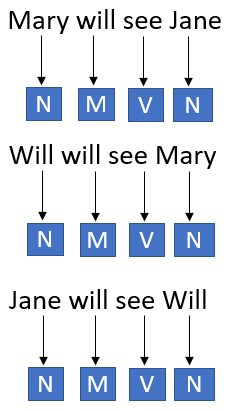

the new lookup table becomes -

|  | Noun   |Verb|Modal|
|------|------|------|------|
|Mary|2|0|0|
|see|0|3|0|
|Jane|2|0|0|
|Will|2|0|3|

### <font color='red'>Q2. How will you tag the sentence - `Mary will see Will`</font>

<ol>
    <li>Mary ->N</li>
    <li>will ->M</li>
    <li>see ->V</li>
    <li>Will ->M</li>
</ol>    

How to solve the above problem? 

Bigrams

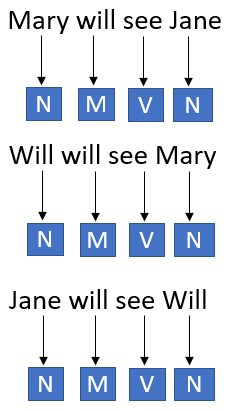

|  | Noun-Modal   |Modal-Verb|Verb-Noun|
|------|------|------|------|
|mary-will|1|0|0|
|will-see|0|3|0|
|see-jane|0|0|1|
|will-will|1|0|0|
|see-mary|0|0|1|
|jane-will|1|0|0|
|see-will|0|0|1|

<ol>
    <li>Mary ->N</li>
    <li>will ->M</li>
    <li>see ->V</li>
    <li>Will ->N</li>
</ol>    